# SIO113: Practice Problems
### Lecture 19

<div class="alert alert-block alert-info"><b>Preliminaries</b>
    
- Rename this notebook using the format YourLastname_FirstInitial_PP_LectureNumber.ipynb.
    
- Answer each question in a separate cell.
</div>

**1. Rose diagrams**
- NOAA collects wind directional data for the US which we can download and do whatever we like with it (decide whether or not to go sailing or surfing, for example).  We can also plot the data as a rose diagram.  :)
-  We downloaded data for May 14, 2017 (Mother's day) from this search:  http://www.ndbc.noaa.gov/radial_search.php?lat1=33N&lon1=117W&uom=E&dist=250&ot=A&time=1 and reformatted the file as a CSV datafile in  `Datasets/WindDirections/wind.csv`.


1. Read in the data as a **pandas** `DataFrame`.  Use the `df.head()` syntax (where `df` is the name of your wind `DataFrame`) to inspect the file first, then you can set the skiprows and/or header keywords appropriately.
2. The wind directions are in the WDIR column. Use `df.dropna()` to get rid of the blank WDIR lines.
3. Plot the WDIR data as a rose diagram.

In [1]:
# importing python packages needed for this practice problem set
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats 

In [2]:
# reading the noaa data as a pandas dataframe
wind = pd.read_csv('Datasets/WindDirections/wind.csv', header = 1)
wind.head(25)

,LAT,LON,DIST,HDG,WDIR,WSPD
0,32.87,-117.26,15,239,320.0,7.0
1,32.87,-117.26,15,239,310.0,7.0
2,32.87,-117.26,15,239,310.0,8.0
3,32.87,-117.26,15,239,310.0,8.0
4,32.87,-117.26,15,239,310.0,8.0
5,32.87,-117.26,15,239,310.0,8.0
6,32.87,-117.26,15,239,320.0,7.0
7,32.87,-117.26,15,239,310.0,8.0
8,32.87,-117.26,15,239,310.0,8.0
9,32.87,-117.26,15,239,300.0,8.0


In [3]:
# use .dropna method to remove non-numerable values
wind.dropna(subset=['WDIR','WSPD'], inplace=True)
wind.head(15)

,LAT,LON,DIST,HDG,WDIR,WSPD
0,32.87,-117.26,15,239,320.0,7.0
1,32.87,-117.26,15,239,310.0,7.0
2,32.87,-117.26,15,239,310.0,8.0
3,32.87,-117.26,15,239,310.0,8.0
4,32.87,-117.26,15,239,310.0,8.0
5,32.87,-117.26,15,239,310.0,8.0
6,32.87,-117.26,15,239,320.0,7.0
7,32.87,-117.26,15,239,310.0,8.0
8,32.87,-117.26,15,239,310.0,8.0
9,32.87,-117.26,15,239,300.0,8.0


In [5]:
#define variable wdir to be equal to the WDIR data series 
wdir = wind.WDIR 

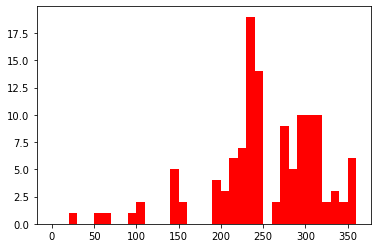

In [6]:
#set width of azimuthal bins 
width = 10
#make an array to use for bins in plt.hist
binarray = np.arange(0.0, 360.0 + width, width)
#get back counts on wdir
counts_1, bins, patches = plt.hist(wdir, bins=binarray, color='red')

In [7]:
#delete the last bin
bins = binarray[0:-1]
#convert binarray to radians 
thetas = np.radians(bins)
#make widths array
widths = np.radians(np.ones(len(thetas))*width)

<BarContainer object of 36 artists>

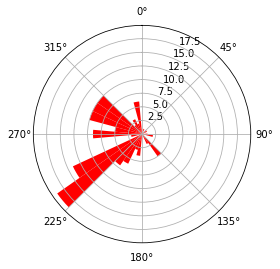

In [8]:
#make the figure instance 
fig = plt.subplot(111, polar=True) #specifying polar axes
#setting the coordinates 
fig.set_theta_direction(-1) #reverse direction of degrees (CW)
fig.set_theta_zero_location('N') #specify 0-degrees as North 
#use the polar bar plot 
fig.bar(thetas, counts_1, width=widths, bottom=0, color='red')

**2. Equal angle nets**  

Somebody measured the direction of the magnetic field at 33N and 117W for the last 10,000 years. Ok not really, but there are models of the secular variation of the field for this.

1. Read in the data file `Datasets/GeomagneticDirections/dec_inc.csv`.
2. Plot the declination (`dec`) and inclination (`inc`) data on an equal angle net as red symbols with black edges.  Declinations are azimuths and inclination are plunges.

In [14]:
#reading in the dataset as a pandas dataframe
geo_dir = pd.read_csv('Datasets/GeomagneticDirections/dec_inc.csv')
#checking to see the format of the dataframe
geo_dir.head()

,Dec,Inc
0,8.97,52.65
1,6.48,49.97
2,3.24,52.09
3,5.04,56.08
4,6.76,55.59


In [15]:
print(geo_dir.mean())
print(geo_dir.std())

Dec    130.8139
Inc     51.1076
dtype: float64
Dec    169.893166
Inc      4.088958
dtype: float64


In [16]:
#math for the equal angle function (preserve shape of things)
EqualAngle = lambda Pl: 90.0 * np.tan(np.radians(90.0 - Pl)/(2.0))
#math for the equal area function (preserve size of things)
EqualArea = lambda Pl: np.sqrt(2.0) * 90.0 * np.sin(np.radians(90.0 - Pl)/(2.0))

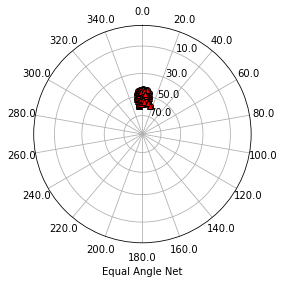

In [19]:
#make array of azimuths (declination)
Azs = geo_dir.Dec
#make array of plunges (inclination)
Pls = geo_dir.Inc
#make a plot instance with polar axes
geofig = plt.subplot(111, polar=True)

#set the coordinates (similar to the rose diagram)
geofig.set_theta_direction(-1) #reverse direction of degrees (CW)
geofig.set_theta_zero_location('N') #specify 0-degrees as North

#need full 90 degrees, so set scale to the following
plt.polar([0.0],[90.0])

#plot first direction as red dot using equal angle lambda function
#right beside np.radians(Azs), you can put a specific index to plot a single point
plt.polar(np.radians(Azs), (EqualAngle(Pls)), 'ro', mec = 'black')

#plot second direction as a blue square 
plt.polar(np.radians(Azs), (EqualAngle(Pls)), 'r^', mec = 'black')

#make list of contours to plot 
#use list comprehension
#label the azimuths at 20 degree intervals 
#plt.thetagrids() takes a list of azimuths 
AzContours = np.arange(0.0, 360.0, 20.0)
AzLabels = [str(p) for p in AzContours]
plt.thetagrids(AzContours, AzLabels)

#doing the same for plunges
PlContours = [EqualAngle(a) for a in np.arange(10.0, 90.0, 20.0)] #exclude center or edge
#make list of labels 
PlLabels = [str(a) for a in np.arange(10.0, 90.0, 20.0)]
#draw on the plunge contours and label them
#plt.rgrids() takes a list of plunges (or radii in matplot) and their labels
plt.rgrids(PlContours, PlLabels)
#Label plot 
plt.xlabel('Equal Angle Net');

**3. Equal area Nets**
1. Re-plot the declination (`dec`) and inclination (`inc`) data from Question 2 (above) on an equal area net.

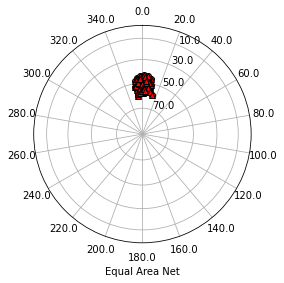

In [20]:
#make array of azimuths (declination)
Azs = geo_dir.Dec
#make array of plunges (inclination)
Pls = geo_dir.Inc

#make a plot instance with polar axes
geofig = plt.subplot(111, polar=True)

#set the coordinates (similar to the rose diagram)
geofig.set_theta_direction(-1) #reverse direction of degrees (CW)
geofig.set_theta_zero_location('N') #specify 0-degrees as North

#need full 90 degrees, so set scale to the following
plt.polar([0.0],[90.0])

#plot first direction as red dot using equal area lambda function
plt.polar(np.radians(Azs), (EqualArea(Pls)), 'ro', mec = 'black')

#plot second direction as a blue square 
plt.polar(np.radians(Azs), (EqualArea(Pls)), 'r^', mec = 'black')

#make list of contours to plot 
#use list comprehension
#label the azimuths at 20 degree intervals 
#plt.thetagrids() takes a list of azimuths 
AzContours = np.arange(0.0, 360.0, 20.0)
AzLabels = [str(p) for p in AzContours]
plt.thetagrids(AzContours, AzLabels)

#doing the same for plunges
PlContours = [EqualArea(a) for a in np.arange(10.0, 90.0, 20.0)] #exclude center or edge
#make list of labels 
PlLabels = [str(a) for a in np.arange(10.0, 90.0, 20.0)]
#draw on the plunge contours and label them
#plt.rgrids() takes a list of plunges (or radii in matplot) and their labels
plt.rgrids(PlContours, PlLabels)
#Label plot 
plt.xlabel('Equal Area Net');

<div class="alert alert-block alert-danger"><b> 
To receive full credit, your notebook:
    
1. Must have the correct name;
2. Must be fully commented;
3. Must run as expected;
4. Must be submitted into Canvas before the deadline.
</b></div>